In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

In [109]:
fc = 20
min_separation = 0.6 / (2.0 * fc + 1)
N = int(1.0/min_separation-1)

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)

K0 = kernel_matrix(kernel, support)
K1 = kernel_matrix(kernel.derivative(), support)
K2 = kernel_matrix(kernel.derivative().derivative(), support)

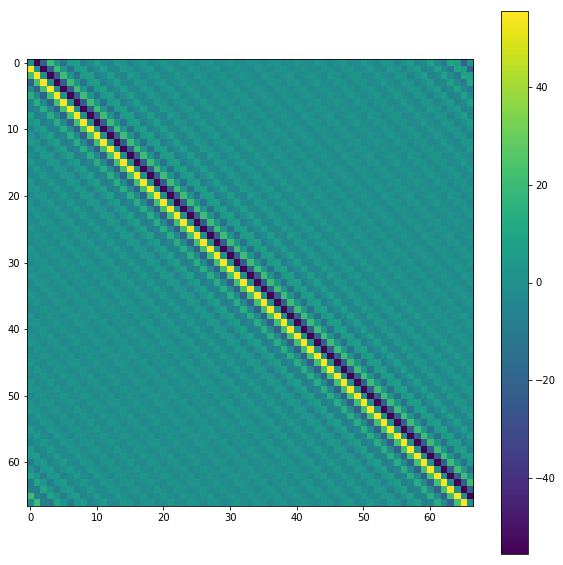

In [110]:
plt.subplots(figsize=(10, 10))
plt.imshow(K1)
plt.colorbar()

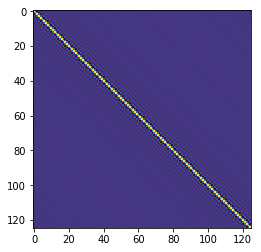

In [56]:
plt.imshow(K0)

(array([  4.,  46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ -6.15720714e-15 -8.60992098e-14j,
         -5.00857938e-15 +6.78107995e+00j,
         -3.85995161e-15 +1.35621599e+01j,
         -2.71132385e-15 +2.03432399e+01j,
         -1.56269608e-15 +2.71243198e+01j,
         -4.14068313e-16 +3.39053998e+01j,
          7.34559453e-16 +4.06864797e+01j,
          1.88318722e-15 +4.74675597e+01j,
          3.03181499e-15 +5.42486396e+01j,
          4.18044275e-15 +6.10297196e+01j,   5.32907052e-15 +6.78107995e+01j]),
 <a list of 10 Patch objects>)

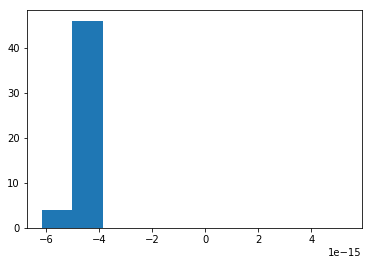

In [106]:
plt.hist(np.linalg.eigvals(K1))

In [26]:
np.diag(np.dot(K1, np.linalg.inv(K0)))

array([ 124.84053859,   56.89963185,   30.79737162,   20.69852321,
          0.43806401,  -29.59992027,  -43.21797916,  -23.73925785,
        -15.37760212,    1.56975609,   21.8850911 ,   -7.17990405,
         -7.31552214,   -5.85018456,   -2.57113185,   -0.83111366,
        -14.61713279,   -4.75610564,   -4.79267741,    6.04103449,
         10.11593725,    3.3568026 ,  -43.65427403,  -42.02501002,
        -34.18247876,  -26.5859769 ,    3.29604223,   19.35587865,
         -8.39038682,  -21.19628852,  -19.01260836,  -11.97419997,
         14.08798609,    2.61069436,    0.26345996,    1.6274467 ,
          3.56746053,  -29.84110099,  -31.84740779,  -35.21473359,
        -25.00048337,   -2.98161359,    5.6384212 ,    7.35081411,
         -3.28308058,    0.91820566,   -1.97845274,  -11.48381075,
         -9.39247275,    8.46799136,    6.88920259,    0.244109  ,
         -1.5922189 ,   -2.97369244,    4.09934749,    7.04164503,
          6.3493974 ,    5.23377782,    5.02422369,   14.80416

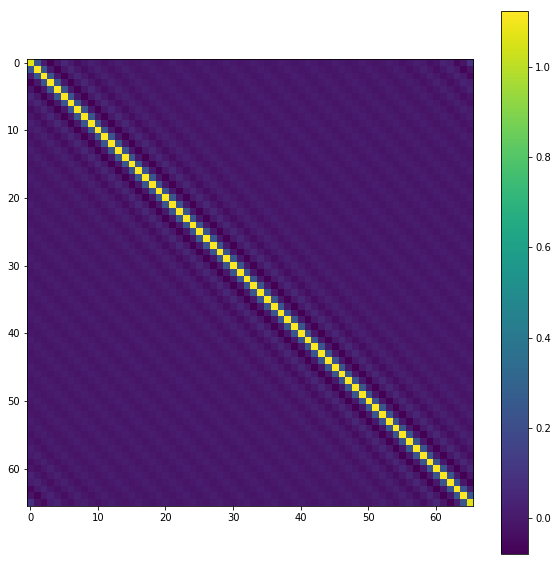

In [8]:
plt.subplots(figsize=(10, 10))
plt.imshow(np.linalg.inv(kernel_matrix(kernel, support)))
plt.colorbar()

# Tridiagonal Approximation

In [3]:
def tridiagonal_part(M):
    M_ret = np.zeros_like(M)
    for i in range(M.shape[0]):
        M_ret[i, i] = M[i, i]
        if i + 1 < M.shape[0]:
            M_ret[i, i + 1] = M[i, i + 1]
            M_ret[i + 1, i] = M[i + 1, i]
        if i - 1 >= 0:
            M_ret[i, i - 1] = M[i, i - 1]
            M_ret[i - 1, i] = M[i - 1, i]
    return M_ret

In [8]:
def tricirculant_part(M):
    M_ret = np.zeros_like(M)
    n = M.shape[0]
    for i in range(M.shape[0]):
        M_ret[i, i] = M[i, i]
        M_ret[i, (i + 1) % n] = M[i, (i + 1) % n]
        M_ret[(i + 1) % n, i] = M[(i + 1) % n, i]
        if i - 1 >= 0:
            M_ret[i, i - 1] = M[i, i - 1]
            M_ret[i - 1, i] = M[i - 1, i]
    return M_ret

In [42]:
fc = 50
min_separation = 1.5 / (2.0 * fc + 1)
N = int(1.0 / min_separation - 1)

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)

K0 = kernel_matrix(kernel, support)

In [44]:
from scipy.optimize import fsolve
f = lambda t: kernel(0).real - kernel(t).real ** 2
fsolve(f, x0=3.0 / 4.0 / fc)

array([ -4.87210679e-11])

In [32]:
K0_td = tridiagonal_part(K0)
K0_ci = tricirculant_part(K0)

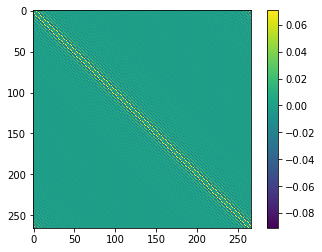

In [33]:
plt.imshow(K0 - K0_td)
plt.colorbar()

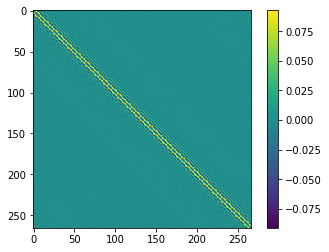

In [34]:
plt.imshow(np.linalg.inv(K0_td) - np.linalg.inv(K0))
plt.colorbar()